<a href="https://colab.research.google.com/github/Zacfletch6/IS_submissions/blob/main/Final_project_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

By Zachary Fletcher
12/1/2025

# Task 1
Import libraries and dataset

In [2]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

**Reason for each import:**
* pandas - I imported pandas to read the csv, create and manipulate dataframes, and use descriptive methods like .describe(), .info(), .dtypes() and .isnull().
* numpy - Numpy is highly compatible with many libaries like sklearn, matplotlib, and pandas. It is good for doing calculations on dataframes.
* matplotlib - Matplotlib has various vizualizations which can be used during EDA and model evaluation.
* warnings - Many libraries illicit warnings each time a relevant model is used. They get annoying and so I remove them.
* DummyCleassifier - used a benchmark to compare the performance of other models.
* train_test_split - used to split the data into training and testing sets for modeling.
* sklearn.tree - This allows us to make the decision tree model using DecisionTreeClassifier and plot the tree with tree.tree_plot().
* GridSearchCV - Allows me to test many different hyperparameters for each model.
* sklearn.metrics - this will allow me to evaluate the performance of each model.
* KNeighborsClassifier - This allows me to make the KNN classification model.
* SVC - Allows me to make an SVC model.
* MLPClassifier - allows me to make an MLP neural network.


In [3]:
# import data

url = 'https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/census.csv'
raw_df = pd.read_csv(url)
df = raw_df.copy()

**What is a dataframe?**

A dataframe is an object from the pandas library, like a 2 way table with rows and columns.


# Task 2
High Level EDA

In [ ]:
print('---Head---')
display(df.head())

print("\n---Dataframe Info---")
df.info()

print("\n---Data Types---")
display(df.dtypes)

print("\n---Null Values---")
display(df.isnull().sum())

print("\n---Descriptive Statistics---")
display(df.describe())

print('\n---Dataframe Shape---')
print(df.shape)

print("\n---Number of duplicate rows---")
print(df.duplicated().sum())

---Head---


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



---Dataframe Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

---Data Types---


,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object



---Null Values---


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0



---Descriptive Statistics---


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



---Dataframe Shape---
(32561, 15)

---Number of duplicate rows---
24


**Interpretation of high level EDA:**

There are 14 features within the dataset. There are no missing values within the column, so deletion and imputation should not be needed. There are 6 numerical features, 8 categorical features. A few columns may have outliers (hours-per-week, capital-gain, capital-loss). However, capital-gain and capital-loss also are very positively skewed. There are 24 duplicates.

# Task 3

Feature level EDA

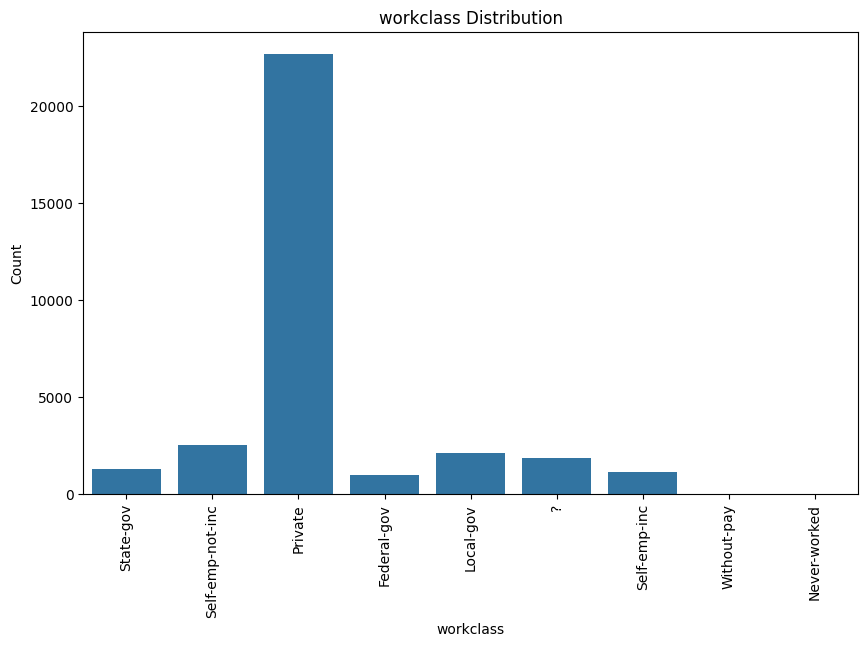

In [ ]:
# Counts of each categorical column
cat_cols = df.select_dtypes(include='object')

for col in  cat_cols:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title(f'{col} Distribution')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
# Exact top 10 value counts of each column
for col in  cat_cols:
  print(f"\n---{col}---")
  display(df[col].value_counts().sort_values(ascending=False))

In [ ]:
# statistics of numerical columns
display(df.describe())

In [ ]:
# show distributions for every numerical row
num_cols = df.select_dtypes(include='int64')

for col in  num_cols:
  plt.figure(figsize=(10, 6))
  sns.histplot(x=col, data=df)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title(f'{col} Distribution')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
# show boxplots for every numerical column
num_cols = df.select_dtypes(include='int64')

for col in num_cols.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(y=df[col])
  plt.ylabel(col)
  plt.title(f'Boxplot of {col}')
  plt.show()

**Interpretations of each column:**
* **age** - Mean age is 38 yrs with deviation of +- 13 yrs. There are specific ages that seem to be very common, specifically those above a count of 900. It's skewed toward residents about 40 yrs and younger.
* **work class** - The vast majority of people work in the private sector, specifically 22696 people. Barely anyone works without pay or has never worked.
* **fnlwgt** - Mean of 1.90 with a deviation of +- 1 weight. The distribution has a few outliers. Most common weight is actually about 0.2, with quartile range between 0.1 and 0.3. This is likely a statistical weight, rather than a predictive feature, representing the 'weight' of each demographic group.
* **education** - Top 3 categories include HS, some college, and bachelors, with a c ount of 10501, 7291, and 5355 respectively.
* **education-num** - Mean of 10.08, and a standard deviation of +- 2.57. The Most common education numbers are 9, 10, and 13. There are a few outliers of 4 and below. Assuming this aligns with education, this should be highschool, some college, and bachelors, respectively.
* **marital-status** - The 2 largest categories are married and never-married with a count of 14976 and 10683, respectively.
* **occupation** - The top 5 occupational categories included Prof-specialty	at 4140, Craft-repair	at 4099, Exec-managerial at 4066, Adm-clerical at 3770, and Sales at 3650.
* **relationship** - The top 3 relationships are Husband at 13193, Not-in-family at 8305, and Own-child at 5068. Notably, wives are the least common.
* **race** - The vast majority of people are white, followed by black, with a count of 27816 and 3124, respectively.
* **sex** - There are nearly twice as many males then females, with a count of 21790 males and 10771 females.
* **capital-gain** - Mean is 1077.65 with a standard deviation of 7385.29. The median is 0, and the vast majority of people have captial gains lower than 2000. There are some extreme outliers.
* **capital-loss** - Mean is 87.30 with a standard deviation of 402.96. The median is 0, with a decent amount of outliers ranging from about 500-3000.
* **hours-per-week** - Mean is 40.43, a standard work week. Standard deviation is +- 12.34. The median is 40.0, with a minimum of 0 and a maximum of 99. This means there are outliers in below 40 and above 40.
* **native-country** - The vast majority of people are native to the US.


Demographic Pattern: Combining these columns reveals the most common demographic of those who participated in the census, those being white male American, married or single, about 40 years old, who work in the private sector 40 hours a week.

# Task 4

EDA of target variable only

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (y)')
plt.show()

In [ ]:
display(df['y'].value_counts().sort_values(ascending=False))

In [ ]:
# calculate accuracy of majority classifier:
majority_classifier_accuracy = round(df['y'].value_counts()['<=50K']/len(df), 2)
print(f'Majority Classifier Accuracy: {majority_classifier_accuracy}')

**1. Is the data mining task a classification or regression task? In a text block explain the difference between the two.**

Target variable 'y' is a categorical variable. Given that regression can only calculate numerical



**2. Is the target variable balanced or imbalanced? Why is this important?**

The target variable is imbalanced, with <=50k being greater than >50k. This is impotant because having the same number of instances means each class will have the same impact on the model. Because <=50k is the dominant class, it will disproportionately impact the model. if we predicted only based on the majority classifier, it would predict <=50k every time.

**3. What a majority classifier's accuracy would be on this target variable. ie what accuracy do we need to beat to do better than a majority classifier?**

The accuracy is 0.76 = 24720 / 32561.

**4. What classification performance metrics will you be using based on what you have learned about the target variable. Rank the metrics you will be using from most important to least important and explain your reasoning for the ranking.**

Given I will be using classification to predict a categorical variable, I will measure each model with accuracy, precision, recall, and F1 score. I would rank each metric like this: 1. Accuracy, 2. F1 score, 3. precision, 4. recall. My reasoning is that accuracy shows the overall performance of the model, and will be paramount to comparing which models performed the best overall. F1 is second because it is a combination of precision and recall, showing the model's ability to make correct predictions. recall and precision are last because they are further metrics of evaluating model performance. Recall measures the ability to correct classify instances belonging to a particular class. Precision measures the proportion of predicted instances actually in the predicted class.

# Task 5

EDA on Target variables with predictors

In [ ]:
sns.pairplot(df, hue='y')
plt.show()

In [ ]:
# Correlation Matrix Heatmap of numerical variables
num_cols = df.select_dtypes(include='int64')
correlation_matrix = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Create a bargraph of average value for each numerical feature grouped by target variable
num_cols = df.select_dtypes(include=['int64', 'float64']).groupby(df['y']).mean()

for col in num_cols:
    num_cols[col].plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title(f'Mean {col} by Target Variable')
    plt.xlabel('Target Variable)')
    plt.ylabel(f'Mean {col}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
#Boxplots of numerical variables by target variable 'y'
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Distribution of {col} by Target Variable (y)')
    plt.xlabel('Target Variable (y)')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
# graph of proportions of y in each category
for col in cat_cols.columns:
    crosstab_df = pd.crosstab(df[col], df['y'])
    proportional_crosstab = crosstab_df.div(crosstab_df.sum(1).astype(float), axis=0)

    proportional_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Proportional Distribution of Target Variable (y) by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=90)
    plt.legend(title='y')
    plt.tight_layout()
    plt.show()

**Your interpretation of any predictors that appear to have an obvious relationship with the target. Which columns do you suspect will be most useful in predicting the target variable and why?**


Those who earn >50k work more hours, have higher age overall, and generally have a higher education number. People who are older tend to hand higher capital gains. A higher proportion of married couples earn >50k. Occupations like exec-managerial and prof-specialty have higher proportions of >50k earnings. I suspect there is a relationship the features age, hours worked, occuptation, education, and marital status and the target variable.

# Task 6

Encoding

In [4]:
# pop out the target variable
y_target = df.pop('y')

In [5]:
# one hot encode categorical columns in dataset
df_encoded = pd.get_dummies(
    df, columns=df.select_dtypes(include='object').columns.tolist())

In [6]:
print("\nShape of the original DataFrame:", df.shape)
print("\nShape of the encoded DataFrame:", df_encoded.shape)

print("Original DataFrame head:")
display(df.head())

print("\nOne-Hot Encoded DataFrame head:")
display(df_encoded.head())

print("\nColumns of the encoded DataFrame:")
display(df_encoded.columns.tolist())


Shape of the original DataFrame: (32561, 14)

Shape of the encoded DataFrame: (32561, 108)
Original DataFrame head:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba



One-Hot Encoded DataFrame head:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Columns of the encoded DataFrame:


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_?',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-rep

**Make a column by column explanation for one-hot encoding your predictor dataframe**

note: numerical columns will be unaffected by dummy encoding. the following have been one-hot encoded:

* **work class** - each work class will be expanded into it's own binary column.
* **education** - each education level will be expanded into it's own binary column. When one-hot encoding, the education column's ordinality is lost, but the education-num column maintains the ordinality lost in encoding.
* **marital-status** - each education level will be expanded into its own binary column.
* **occupation** - each education level will be expanded into it's own binary column.
* **relationship** - each relationship will be expanded into it's own bianry column.
* **race** - each education level will be expanded into it's own binary column.
* **sex** - each sex will be expanded into it's own binary column.
* **native-country** - Each contry will be expanded into it's own binary column.

**Describe the difference pre and post encoding of the dataframe. How has the shape changed?**

The dimensionality has increased tenfold. Specifically, there were 15 columns, and now there are 108, which will drastically increase the time it takes to train each model.

# Task 7

Modeling

In [12]:
# Creates a dummy model using a majority classifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(df_encoded, y_target)

DummyClassifier(strategy='most_frequent')

In [ ]:
# Model 1 - Decision Tree - 75 models - 2 min execution
tree_params = {
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10, 20]
}
scoring = ["accuracy", "precision", "recall", "f1"]
tree_clf = tree.DecisionTreeClassifier()
tree_grid = GridSearchCV(tree_clf, tree_params, cv=5, scoring=scoring, refit='accuracy')
tree_grid.fit(df_encoded, y_target)

In [ ]:
# Model 4 - K Nearest Neighbors (KNN) - 36 models - 19 min execution
knn_params = {
    'n_neighbors': [i for i in range(1, 50, 5)],
    'p': [1, 2]
}
scoring = ["accuracy", "precision", "recall", "f1"]
knn_clf = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf, knn_params, cv=3, scoring=scoring, refit='accuracy')
knn_grid.fit(df_encoded, y_target)

In [7]:
# Model 2 - Support Vector Machine (SVM) - 18 models - 16 minutes

svc_params = {
    'C': [1, 10, 50],
    'kernel': ['poly', 'rbf', 'sigmoid']
}
scoring = ["accuracy", "precision", "recall", "f1"]
svc_clf = SVC(random_state=42)
svc_grid = GridSearchCV(svc_clf, svc_params, cv=3, scoring=scoring, refit='accuracy')
svc_grid.fit(df_encoded, y_target)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [1, 10, 50], 'kernel': ['rbf', 'sigmoid']},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [9]:
# Model 3 - Multilayer Perceptron (MLP) Nueral Network - 80 models - 19 min to execute
mlp_params = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (25, 50), (50, 50), (100, 50), (100, 100), (10,10,10)]
}
scoring = ["accuracy", "precision", "recall", "f1"]
mlp_clf = MLPClassifier(random_state=2021, max_iter=500)
mlp_grid = GridSearchCV(mlp_clf, mlp_params, cv=5, scoring=scoring, refit='accuracy')
mlp_grid.fit(df_encoded, y_target)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=2021),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (100,), (25, 50),
                                                (50, 50), (100, 50), (100, 100),
                                                (10, 10, 10)]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

# Task 8

Model Comparison

# Task 9

Final Reccamendation